In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from copy import deepcopy

from qibo.backends import construct_backend
from qibo import hamiltonians, Circuit, gates, set_backend
from qibo import gates, symbols
from qibo.gates import Unitary, CNOT, CZ
from qibo.symbols import X, Y, Z
from qibo import hamiltonians
from qibo.hamiltonians import Hamiltonian, SymbolicHamiltonian

from db_doi.group_commutator_iteration import GroupCommutatorIteration, DoubleBracketRotationApproximationType
from db_doi.utils_XXZ_compilation import *

/home/marek/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


#### 1 For each $L$ run HVA

In [2]:
def run_HVA_training(L, nlayers_max = 2, niter = 1):
    print("---------------\n\n")
    print(f"Initializing HVA training for L={L} and up to {nlayers_max} layers.")
    print(f"Will not run basinhopping." if niter == 0 else f"Will run basinhopping with {niter} iterations")

    H_XXZ = XXZ_compilation_line(L,gateset="CNOT")

    data_collection = {}
    E0,E1 = H_XXZ.eigenergies_ED()
    print(E0,E1)
    data_collection["E0"] = E0
    data_collection["E1"] = E1

    HVA_circ = {}

    for nlayers in range(1,nlayers_max+1):
        print(f"\nRunning layer number {nlayers} for system size L={L}")
        HVA_circ, E_HVA, t_HVA = H_XXZ.find_XXZ_HVA_circuit(nlayers=nlayers, please_use_basinhopping= niter)
        data_collection[f"HVA_Nlayers_{nlayers}"] = { "nlayers": nlayers, "circuit": HVA_circ, "E_HVA": E_HVA, "t_HVA": t_HVA } 

    from db_doi.utils_reporting import save_data, simulation_data_path
    save_data(data_collection, simulation_data_path() + f"XXZ_HVA_data_L{L}")

In [3]:
run_HVA_training(6,6,3)

---------------


Initializing HVA training for L=6 and up to 6 layers.
Will run basinhopping with 3 iterations


[Qibo 0.2.21|INFO|2025-08-05 22:53:45]: Using qibojit (numba) backend on /CPU:0


-9.974308535551723 -8.00798142759415

Running layer number 1 for system size L=6
Initial loss: -9.3523324962421
basinhopping step 0: f -9.881

   Normal return from subroutine COBYLA

   NFVALS =   31   F =-9.880996E+00    MAXCV = 0.000000E+00
   X = 2.160346E-01   1.417298E-01
basinhopping step 1: f -9.80237 trial_f -9.80237 accepted 1  lowest_f -9.881

   Normal return from subroutine COBYLA

   NFVALS =   39   F =-9.802367E+00    MAXCV = 0.000000E+00
   X = 9.961355E-01   1.695491E+00
basinhopping step 2: f -9.80237 trial_f -9.80237 accepted 1  lowest_f -9.881
   Normal return from subroutine COBYLA

   NFVALS =   34   F =-9.802367E+00    MAXCV = 0.000000E+00
   X = 9.962032E-01   1.695482E+00

basinhopping step 3: f -9.80237 trial_f -9.80237 accepted 1  lowest_f -9.881
Final cost function:
-9.880995628986685
Parameters yielding final value:
[0.21603462 0.14172978]

Running layer number 2 for system size L=6

   Normal return from subroutine COBYLA

   NFVALS =   37   F =-9.802367E+

In [4]:
run_HVA_training(8,6,3)

---------------


Initializing HVA training for L=8 and up to 6 layers.
Will run basinhopping with 3 iterations
-13.499730394751603 -11.928961951051525

Running layer number 1 for system size L=8
Initial loss: -12.434890163749998
basinhopping step 0: f -13.2998
   Normal return from subroutine COBYLA

   NFVALS =   40   F =-1.329982E+01    MAXCV = 0.000000E+00
   X = 2.161001E-01   1.386892E-01

basinhopping step 1: f -13.1617 trial_f -13.1617 accepted 1  lowest_f -13.2998
   Normal return from subroutine COBYLA

   NFVALS =   40   F =-1.316172E+01    MAXCV = 0.000000E+00
   X = 5.756349E-01   1.451508E+00

basinhopping step 2: f -13.1617 trial_f -13.1617 accepted 1  lowest_f -13.2998
   Normal return from subroutine COBYLA

   NFVALS =   40   F =-1.316172E+01    MAXCV = 0.000000E+00
   X = 5.754905E-01   1.451412E+00

basinhopping step 3: f -13.1617 trial_f -13.1617 accepted 1  lowest_f -13.2998
   Normal return from subroutine COBYLA

   NFVALS =   36   F =-1.316172E+01    MAXCV = 0.

In [5]:
run_HVA_training(10,6,3)

---------------


Initializing HVA training for L=10 and up to 6 layers.
Will run basinhopping with 3 iterations
-17.032140829131595 -15.722694358006184

Running layer number 1 for system size L=10
Initial loss: -15.517447831257897
basinhopping step 0: f -16.7193

   Normal return from subroutine COBYLA

   NFVALS =   38   F =-1.671931E+01    MAXCV = 0.000000E+00
   X = 2.161186E-01   1.369796E-01
basinhopping step 1: f -16.5234 trial_f -16.5234 accepted 1  lowest_f -16.7193
   Normal return from subroutine COBYLA

   NFVALS =   36   F =-1.652341E+01    MAXCV = 0.000000E+00
   X = 5.759661E-01   1.453980E+00

basinhopping step 2: f -16.7193 trial_f -16.7193 accepted 1  lowest_f -16.7193
found new global minimum on step 2 with function value -16.7193

   Normal return from subroutine COBYLA

   NFVALS =   36   F =-1.671931E+01    MAXCV = 0.000000E+00
   X = 1.354743E+00   1.433667E+00
basinhopping step 3: f -16.5234 trial_f -16.5234 accepted 1  lowest_f -16.7193
   Normal return from su

In [6]:
run_HVA_training(12,6,3)

---------------


Initializing HVA training for L=12 and up to 6 layers.
Will run basinhopping with 3 iterations
-20.568362531362006 -19.444591748145438

Running layer number 1 for system size L=12
Initial loss: -18.600005498765803
basinhopping step 0: f -20.139
   Normal return from subroutine COBYLA

   NFVALS =   35   F =-2.013903E+01    MAXCV = 0.000000E+00
   X = 2.161222E-01   1.363896E-01

basinhopping step 1: f -20.139 trial_f -20.139 accepted 1  lowest_f -20.139
   Normal return from subroutine COBYLA

   NFVALS =   40   F =-2.013904E+01    MAXCV = 0.000000E+00
   X = 1.354772E+00  -1.362788E-01

found new global minimum on step 1 with function value -20.139
basinhopping step 2: f -19.886 trial_f -19.886 accepted 1  lowest_f -20.139

   Normal return from subroutine COBYLA

   NFVALS =   34   F =-1.988595E+01    MAXCV = 0.000000E+00
   X = 2.565331E+00   1.154999E-01
basinhopping step 3: f -20.139 trial_f -20.139 accepted 1  lowest_f -20.139
   Normal return from subroutine CO

In [7]:
run_HVA_training(14,6,5)

---------------


Initializing HVA training for L=14 and up to 6 layers.
Will run basinhopping with 5 iterations
-24.106898647448645 -23.12197041784953

Running layer number 1 for system size L=14
Initial loss: -21.68256316627371
basinhopping step 0: f -23.5589
   Normal return from subroutine COBYLA

   NFVALS =   37   F =-2.355888E+01    MAXCV = 0.000000E+00
   X = 2.160326E-01   1.356905E-01

basinhopping step 1: f -23.5589 trial_f -23.5589 accepted 1  lowest_f -23.5589
   Normal return from subroutine COBYLA

   NFVALS =   32   F =-2.355888E+01    MAXCV = 0.000000E+00
   X =-2.161254E-01  -1.357582E-01

found new global minimum on step 1 with function value -23.5589
basinhopping step 2: f -23.5589 trial_f -23.2489 accepted 0  lowest_f -23.5589
   Normal return from subroutine COBYLA

   NFVALS =   39   F =-2.324888E+01    MAXCV = 0.000000E+00
   X = 5.762843E-01  -1.145134E-01

basinhopping step 3: f -23.5589 trial_f -23.5589 accepted 1  lowest_f -23.5589
   Normal return from subr

In [8]:
run_HVA_training(16,6,5)

---------------


Initializing HVA training for L=16 and up to 6 layers.
Will run basinhopping with 5 iterations
-27.646948582300283 -26.769841716098806

Running layer number 1 for system size L=16
Initial loss: -24.7651208337816
basinhopping step 0: f -26.9788

   Normal return from subroutine COBYLA

   NFVALS =   37   F =-2.697880E+01    MAXCV = 0.000000E+00
   X = 2.160696E-01   1.354034E-01
basinhopping step 1: f -26.612 trial_f -26.612 accepted 1  lowest_f -26.9788
   Normal return from subroutine COBYLA

   NFVALS =   39   F =-2.661202E+01    MAXCV = 0.000000E+00
   X = 9.942638E-01   1.140866E-01

basinhopping step 2: f -26.612 trial_f -26.612 accepted 1  lowest_f -26.9788
   Normal return from subroutine COBYLA

   NFVALS =   36   F =-2.661202E+01    MAXCV = 0.000000E+00
   X = 5.764145E-01  -1.138789E-01

basinhopping step 3: f -26.612 trial_f -26.612 accepted 1  lowest_f -26.9788
   Normal return from subroutine COBYLA

   NFVALS =   42   F =-2.661203E+01    MAXCV = 0.000000

In [9]:
run_HVA_training(18,6,5)

---------------


Initializing HVA training for L=18 and up to 6 layers.
Will run basinhopping with 5 iterations
-31.18804427414599 -30.397139536466263

Running layer number 1 for system size L=18
Initial loss: -27.847678501289515
basinhopping step 0: f -30.3988
   Normal return from subroutine COBYLA

   NFVALS =   38   F =-3.039875E+01    MAXCV = 0.000000E+00
   X = 2.162044E-01   1.349368E-01

basinhopping step 1: f -30.3988 trial_f -30.3988 accepted 1  lowest_f -30.3988
   Normal return from subroutine COBYLA

   NFVALS =   34   F =-3.039875E+01    MAXCV = 0.000000E+00
   X = 1.786999E+00   1.349558E-01

found new global minimum on step 1 with function value -30.3988
basinhopping step 2: f -29.9753 trial_f -29.9753 accepted 1  lowest_f -30.3988
   Normal return from subroutine COBYLA

   NFVALS =   37   F =-2.997530E+01    MAXCV = 0.000000E+00
   X = 2.147487E+00  -1.134212E-01

basinhopping step 3: f -29.9753 trial_f -29.9753 accepted 1  lowest_f -30.3988
   Normal return from sub

In [10]:
run_HVA_training(20,6,5)

---------------


Initializing HVA training for L=20 and up to 6 layers.
Will run basinhopping with 5 iterations
-34.72989333759567 -34.00951479218718

Running layer number 1 for system size L=20
Initial loss: -30.93023616879742
basinhopping step 0: f -33.8187
   Normal return from subroutine COBYLA

   NFVALS =   40   F =-3.381874E+01    MAXCV = 0.000000E+00
   X = 2.162254E-01   1.348166E-01

basinhopping step 1: f -33.3387 trial_f -33.3387 accepted 1  lowest_f -33.8187
   Normal return from subroutine COBYLA


   NFVALS =   35   F =-3.333867E+01    MAXCV = 0.000000E+00
   X = 9.941183E-01   1.130865E-01
basinhopping step 2: f -33.3387 trial_f -33.3387 accepted 1  lowest_f -33.8187
   Normal return from subroutine COBYLA

   NFVALS =   31   F =-3.333867E+01    MAXCV = 0.000000E+00
   X = 5.766282E-01   1.457644E+00

basinhopping step 3: f -33.3387 trial_f -33.3387 accepted 1  lowest_f -33.8187
   Normal return from subroutine COBYLA

   NFVALS =   39   F =-3.333867E+01    MAXCV = 0.0

In [13]:
from db_doi.utils_reporting import load_data,simulation_data_path
data_collection = load_data(simulation_data_path() + f"XXZ_HVA_data_L{20}")
print(data_collection.keys())


dict_keys(['E0', 'E1', 'HVA_Nlayers_1', 'HVA_Nlayers_2', 'HVA_Nlayers_3', 'HVA_Nlayers_4', 'HVA_Nlayers_5', 'HVA_Nlayers_6'])


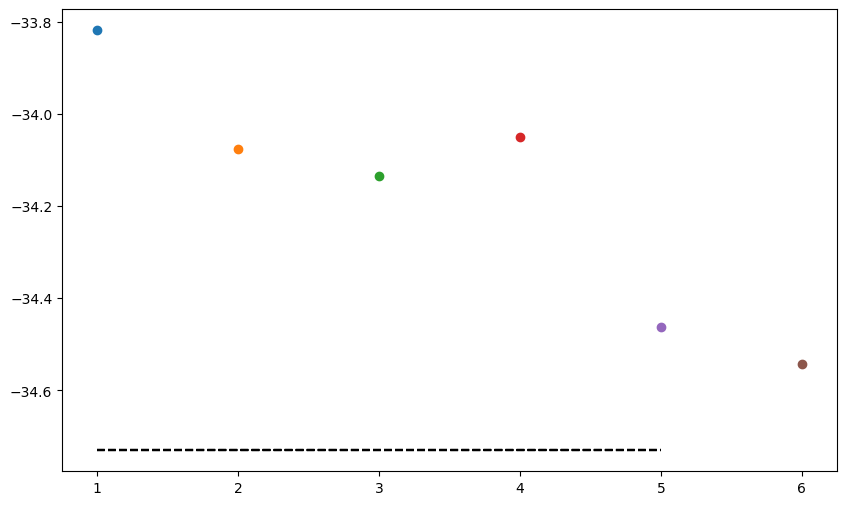

In [16]:
plt.figure(figsize=(10, 6))
for nlayers in range(1,6+1):
    E_HVA = data_collection[f"HVA_Nlayers_{nlayers}"]["E_HVA"]
    plt.plot(nlayers, E_HVA, 'o', label=f'Nlayers={nlayers}')
    plt.plot(np.arange(1,6), [data_collection["E0"]]*5, 'k--', label='E0')

Task 2: Please run (and first fix) this brute force grid search for t1 t2 in HVA nlayer=1; I want to see a plot what is the landscape

In [ ]:
fs = []
f2 = []
for t1 in np.linspace(-.31,.3,8):
    for t2 in np.linspace(-.3,.3,8):
        init_circ2, f, _ = H_XXZ.find_XXZ_HVA_circuit(nlayers=1,warm_start_qc=init_circ,initial_params=[t1,t2])
        fs.append(f)
        f2.append([t1,t2,f])
min_f = min(fs)
print("Minimum function value found:", min_f)

Task 3: add basinhopping as an option with a flag in XXZ_compilation utils and execute similar as above storing with added file name _basinhopping_ --- if basinhopping takes more than 2 hs then terminate or use less niter

In [ ]:
a, x,z = H_XXZ.find_XXZ_HVA_circuit(nlayers=1, please_use_basinhopping=True)

In [ ]:

init_circ, a,b = H_XXZ.find_XXZ_HVA_circuit(nlayers=1)

In [ ]:

init_circ, _, _ = find_XXZ_HVA_circuit(H_XXZ,nlayers=4)

In [ ]:
basinhopping_result_4_layers = [3.384042E-01,   1.290683E-01 ,  5.686232E-02,   1.402387E-01,   1.336091E-01,
       9.758775E-02,   1.067223E-02,   1.764419E-03]
basinhopping_result_4_layers_circuit = Circuit(L)

for n in range(4):    
    basinhopping_result_4_layers_circuit = H_XXZ.XXZ_HVA_circuit(basinhopping_result_4_layers[2*n], basinhopping_result_4_layers[2*n+1],
                                                                  qc=basinhopping_result_4_layers_circuit)


In [ ]:
from dbf_dbqa.utils_reporting import take_verbose_step   
gci_hva3 = GroupCommutatorIteration(
    h=deepcopy(H_XXZ),
    preparation_circuit=init_circ,
    double_bracket_rotation_approximation_type=DoubleBracketRotationApproximationType.group_commutator_reduced)

gci_hva3.h.circuit = lambda t_duration: (
            deepcopy(gci_hva3.preparation_circuit)
            + gci_hva3.h.original_circuit(t_duration/2) + gci_hva3.h.original_circuit(t_duration/2)
            + gci_hva3.preparation_circuit.invert()
            )
#gci_hva3.double_bracket_rotation_approximation_type = DoubleBracketRotationApproximationType.group_commutator_third_order_reduced
take_verbose_step(gci_hva3,dbf)
take_verbose_step(gci_hva3,dbf)
take_verbose_step(gci_hva3,dbf)

In [ ]:
from dbf_dbqa.utils_reporting import take_verbose_step   
gci_hva2 = GroupCommutatorIteration(
    h=deepcopy(H_XXZ),
    preparation_circuit=init_circ,
    double_bracket_rotation_approximation_type=DoubleBracketRotationApproximationType.group_commutator_reduced)
take_verbose_step(gci_hva2,dbf)

In [ ]:
take_verbose_step(gci_hva2,dbf)

In [ ]:
take_verbose_step(gci_hva2,dbf)

In [ ]:
gci_hva3 = GroupCommutatorIteration(
    h=deepcopy(H_XXZ),
    preparation_circuit=init_circ3,
    double_bracket_rotation_approximation_type=DoubleBracketRotationApproximationType.group_commutator_reduced)
for i in range(3):
    take_verbose_step(gci_hva3,dbf) 

In [ ]:
from collections import Counter
two_qubit_counter = lambda circ: sum(1 for gate in circ.queue if len(gate.qubits) == 2)

dbf_dbqa_two_qubit_counts = [ two_qubit_counter(init_circ) ]
dbf_dbqa_energies =  [ gci_hva.loss() ]
for step in range(5):
    print("--------------------------")
    print(f"Step {step+1}")   

    step_grid = np.linspace(0.001, 0.05, 15)
    s_opt, s_min, losses, _ = gci_hva.choose_step(
        dbf, step_grid=step_grid)
    print("Step grid:", step_grid)
    print("Losses:", losses)
    print(f"Optimal step: {s_opt}")
    print(f"Minimum loss: {s_min}")
    plt.figure()
    plt.plot(step_grid, losses, marker='o')
    plt.xlabel('Step size')
    plt.ylabel('Loss')
    plt.title('Loss vs Step size for gci_hva.choose_step')
    plt.show()
   
    gci_hva(s_opt, dbf)
    print("Circuit analysis after:")
    print_gate_count_report(gci_hva.preparation_circuit)  
    dbf_dbqa_two_qubit_counts.append( two_qubit_counter(gci_hva.preparation_circuit))
    dbf_dbqa_energies.append( gci_hva.loss() )    

In [ ]:
plt.figure()
plt.plot(dbf_dbqa_two_qubit_counts, dbf_dbqa_energies, marker='o')
plt.xlabel('Two-qubit gate count')
plt.ylabel('Energy')
plt.title('Energy vs Two-qubit gate count for DBF-DBQA')
plt.show()

In [ ]:
import pickle

def load_data(filename):
    with open(filename+'.pickle', 'rb') as file:
        # Load the object from the file
        data = pickle.load(file)
    return data

def run_param_rc(fontsize = 30):
        import matplotlib.pyplot as plt
        plt.rcParams['axes.labelsize'] = fontsize
        plt.rcParams['axes.titlesize'] = fontsize
        plt.rcParams['font.size'] = fontsize
        #set_matplotlib_formats('pdf', 'png')
        plt.rcParams['savefig.dpi'] = 75
        plt.rcParams['lines.linewidth'] = 2.0
        plt.rcParams['lines.markersize'] = 8
        plt.rcParams['legend.fontsize'] = 12
        plt.rcParams['legend.labelspacing'] = .3
        plt.rcParams['legend.columnspacing']= .3
        plt.rcParams['legend.handletextpad']= .1
        plt.rcParams['text.usetex'] = True
        plt.rcParams['font.family'] = "serif"
        plt.rcParams['font.serif'] = "cm"

path = "../simulation_results/Qrisp_simulations_DB_QITE_and_QPE/data/benchmarks_2nd_L=16_05-21-18"
db_qite_simulation_results = load_data(path)
db_qite_energies = db_qite_simulation_results[1]['optimal_energies']
db_qite_cz_counts = [db_qite_simulation_results[0]['circuit_data'][0][i]['cz'] for i in range(len(db_qite_energies))]
print(db_qite_energies)

In [ ]:
plt.figure()
plt.plot(dbf_dbqa_two_qubit_counts, dbf_dbqa_energies, marker='o')
plt.plot(db_qite_cz_counts, db_qite_energies, marker='x', label='DB-QITE')
plt.xlabel('Two-qubit gate count')
plt.ylabel('Energy')
plt.title('Energy vs Two-qubit gate count for DBF-DBQA')
plt.show()

In [ ]:
from dbf_dbqa.utils_reporting import take_verbose_step   
take_verbose_step(gci_hva,dbf)

In [ ]:
take_verbose_step(gci_hva,dbf)

In [ ]:
take_verbose_step(gci_hva,dbf)

In [ ]:
take_verbose_step(gci_hva,dbf)

In [ ]:
from qrisp.operators import X, Y, Z

import numpy as np
import networkx as nx
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

import pickle

def save_data(data, filename):  
    # Open a file for writing
    with open(filename+'.pickle', 'wb') as file:
        # Write the object to the file
        pickle.dump(data, file)

def load_data(filename):
    with open(filename+'.pickle', 'rb') as file:
        # Load the object from the file
        data = pickle.load(file)
    return data

def compute_moments(psi, H):
    E = (psi.conj().T @ H.dot(psi)).real
    S = (psi.conj().T @ (H @ H).dot(psi)).real
    return E, S, S - E**2

def run_param_rc(fontsize = 30):
        import matplotlib.pyplot as plt
        plt.rcParams['axes.labelsize'] = fontsize
        plt.rcParams['axes.titlesize'] = fontsize
        plt.rcParams['font.size'] = fontsize
        #set_matplotlib_formats('pdf', 'png')
        plt.rcParams['savefig.dpi'] = 75
        plt.rcParams['lines.linewidth'] = 2.0
        plt.rcParams['lines.markersize'] = 8
        plt.rcParams['legend.fontsize'] = 12
        plt.rcParams['legend.labelspacing'] = .3
        plt.rcParams['legend.columnspacing']= .3
        plt.rcParams['legend.handletextpad']= .1
        plt.rcParams['text.usetex'] = True
        plt.rcParams['font.family'] = "serif"
        plt.rcParams['font.serif'] = "cm"

In [ ]:

path = "../simulation_results/Qrisp_simulations_DB_QITE_and_QPE/data/benchmarks_2nd_L=16_05-21-18"
db_qite_simulation_results = load_data(path)
print(db_qite_simulation_results[1]['optimal_energies'])


In [ ]:
db_qite_simulation_results[1].keys()

In [ ]:
print(db_qite_simulation_results[1]['optimal_energies'])

In [ ]:
print(db_qite_simulation_results[1]['circuit_data'])

In [ ]:

results_10 = load_data('data/benchmarks_2nd_L=10_05-21-16') 
results_12 = load_data('data/benchmarks_2nd_L=12_05-21-17')
results_14 = load_data('data/benchmarks_2nd_L=14_05-21-17')  
results_16 = load_data('data/benchmarks_2nd_L=16_05-21-18')  
results_18 = load_data('data/benchmarks_2nd_L=18_05-21-19')  
results_20 = load_data('data/benchmarks_2nd_L=20_05-21-22') 

results_QITE = dict()
results_QITE[10] = results_10
results_QITE[12] = results_12
results_QITE[14] = results_14
results_QITE[16] = results_16
results_QITE[18] = results_18
results_QITE[20] = results_20


In [ ]:
def generate_plot_E_DBQITE(ax1, L):
    
    lables_energies=[r"~$~\ |\omega_0\rangle =|$Singlet$\rangle = 2^{-L/4}(|01\rangle-|10\rangle)^{\otimes L/2}$",
                     r"~$~\ |\omega_0\rangle =|$HVA$\rangle = U_\mathrm{HVA}|\mathrm{Singlet}\rangle$"]
    lables_fidelities=[r"$F_k\ |$Singlet$\rangle$",r"$F_k\ |$HVA$\rangle$"]
    alphas = [1.0, 0.6]
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    markers = ['o', 's', '^', 'v', '<', '>', 'd']
    indices = [0,1] 
    steps = [0,1,2,3,4,5]

    results = db_qite_simulation_results[L]

    ###############################################################################
    # SUBPLOT 1: Energy
    ###############################################################################

    # 1) Plot energies on the left y-axis
    #for i,ind in enumerate(indices):
        #line1, = ax1.plot(results[ind]['evolution_times'], results[ind]['optimal_energies'], label=lables_energies[ind], color='blue', marker=markers[i], linestyle='solid', linewidth=2, zorder=3, alpha=alphas[i])
    ind = indices[ 0]
    line1, = ax1.plot(steps, results[ind]['optimal_energies'], label=lables_energies[ind], 
                      color=colors[0], marker='v', linestyle='solid', linewidth=2, zorder=3, alpha = 0.6)
    ind = indices[1]
    line1, = ax1.plot(steps, results[ind]['optimal_energies'], label=lables_energies[ind],
                      color=colors[0], marker=markers[2], linestyle='solid', linewidth=2, zorder=3)

    ax1.axhline(y=E0_val[L], color="red", linestyle=':', alpha=1.0)
    #ax1.axhline(y=E0_val[L]+0.1, color="orange", linestyle=':', alpha=0.8)
    ax1.axhline(y=E1_val[L], color="red", linestyle=':', alpha=0.6)
    
    ax1.set_xlabel(r"Steps $k$")
    ax1.set_ylabel(r"Energy $E_k$")
    ax1.set_xticks(ticks = range(0, 6, 1))
    ax1.set_yticks(ticks = [-30,-31,-32,-33, -34,-35])
    ax1.legend(loc="center right", fontsize=15)
    ax1.set_title(f"DB-QITE for $L={L}$")

    ###############################################################################

    # 3) Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
   
    ax1.legend(lines_1 , labels_1 , loc="best", ncol=1, fontsize=17)

run_param_rc(23)

index = 1 # 0 Singlet, 1 HVA
markers = ['o', 's', '^', 'v', '<', '>', 'd']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


fig, ((axE_QITE, axF_QITE, axF_QPE)) = plt.subplots(1, 3, figsize=(20, 5))#, gridspec_kw={"width_ratios": [4,2,10,1]})

###############################################################################
# SUBPLOT 1: Energy and fidelity QITE
###############################################################################

generate_plot_E_DBQITE(axE_QITE,20)
axE_QITE.annotate('a)', xy = (-.2, 1.05), xycoords='axes fraction')
axE_QITE.annotate(' ',
            xy=(5.2, E0_val[20]),  # theta, radius
            xytext=(5.2, -32.6),    # fraction, fraction
            textcoords='data',
            arrowprops=dict(facecolor='gray', shrink=0.001),
            horizontalalignment='left',
            verticalalignment='bottom')
axE_QITE.annotate(' ',
            xy=(4.8, -34),  # theta, radius
            xytext=(4.8, -33.1),    # fraction, fraction
            textcoords='data',
            arrowprops=dict(facecolor='gray', shrink=0.001),
            horizontalalignment='left',
            verticalalignment='bottom')
axE_QITE.set_xlim([-0.1,5.35])
axE_QITE.text(
    4.4,           
    -33,       
    r"$\lambda_1$",                          
    va="center",
    ha="left",
    color="black",
    alpha = 0.6
)   

axE_QITE.text(
    4.8,           
    -32.5  ,           
    r"$\lambda_0$",                           
    va="center",
    ha="left",
    color="black"
    )
###############################################################################
# SUBPLOT 2: Fidelity and CZ count QITE
###############################################################################

#generate_fidelity_cz_qite(axF_QITE, "HVA")
ax = axF_QITE
init_type="HVA"

if init_type=="Singlet":
    index = 0
    ax.set_title(r"DB-QITE for $|$Singlet$\rangle$")
if init_type=="HVA":
    index = 1
    ax.set_title(r"DB-QITE for $|$HVA$\rangle$")

steps = list(range(0,6))

cz_data_qite = dict()

for i,L in enumerate(list(range(10,22,2))):
    results = db_qite_simulation_results[L]
    cz = np.array([results[index]["circuit_data"][0][k]['cz'] for k in steps])
    cz_data_qite[L] = cz

alphas =[0.5,0.75,1,0.7]
cz_count_HVA = {}
fidelities_HVA = {}
ax2 = ax.twinx()
for i,L in enumerate([12,16,20]):
    results = db_qite_simulation_results[L]

    psi = E0_vec[L] # ground state
    states = results[index]["statevectors"]
    fidelities = []
    for phi in states:
        fidelities.append(np.round(np.abs(np.dot(psi.conj().transpose(),phi))**2,3))

    cz_counts = cz_data_qite[L]
    cz_count_HVA[L] = cz_data_qite[L][0]
    fidelities_HVA[L] = fidelities[0]
    ax2.plot(cz_counts, fidelities, marker=markers[i], zorder = 4+i, label=f'$L={L}$',color= colors[0], alpha = alphas[i])


ax.legend(loc="best", ncols=2, fontsize=15)
#ax.set_xticks(ticks = range(0, 6, 1))
ax.set_xscale('log')
ax.set_xlabel(r"Number of CZ gates")
ax.set_ylabel(r"Fidelity $F_k$")
ax.set_title(r"DB-QITE and QPE for $|$HVA$\rangle$")

steps = list(range(1,6))

cz_data_qpe = dict()
for i,L in enumerate([12,16,20]):
    cz = [results_QPE[index][L][k]['ops']['cz'] for k in steps]
    cz.insert(0, cz_count_HVA[L])
    cz_data_qpe[L] = cz


for i,L in enumerate([12,16,20]):
    fidelities = [results_QPE[index][L][k]['F0'] for k in steps]
    fidelities.insert(0, fidelities_HVA[L])
    cz_counts = cz_data_qpe[L]
    #adding the initialization data
    ax.plot(cz_counts, fidelities, marker=markers[i], label=f'$L={L}$', zorder = i, color= colors[1], alpha = alphas[i], markerfacecolor='none')
if init_type=="HVA":
    steps = list(range(1,8))


ax.axhline(y=1, color="orange", linestyle=':', alpha=1.0,linewidth = 1)
ax.axhline(y=0.975, color="orange", linestyle=':', alpha=0.8,linewidth = 1)
ax.axhline(y=0.95, color="orange", linestyle=':', alpha=0.6,linewidth = 1)
ax.legend(loc="best", ncols=1, fontsize=16, title='QPE',title_fontsize='17', bbox_to_anchor=(0.715, 0.42))
ax2.legend(loc="best", ncols=1, fontsize=16, title='DB-QITE',title_fontsize='17', bbox_to_anchor=(0.715, 0.795))

ax.set_xscale('log')
#ax.set_xticks(ticks = range(1, 6, 1))
ax.set_xlabel(r"Number of CZ gates")   
ax.set_ylabel(r"Fidelity $F_k$")
    
axF_QITE.annotate('b)', xy = (-.2, 1.05), xycoords='axes fraction')
#axF_QITE.annotate(r'DB-QITE', xy=(1e4,0.98), textcoords='data', fontsize=15,rotation=90)
#axF_QITE.annotate(r'QPE', xy=(1e4,0.75), textcoords='data', fontsize=15,rotation=90)
###############################################################################
# SUBPLOT 3: Fidelity and CZ count QPE
###############################################################################

L = 20
index = 1 # HVA

results = db_qite_simulation_results[L]

psi = E0_vec[L] # ground state
states = results[index]["statevectors"]
fidelities = []
for phi in states:
    fidelities.append(np.round(np.abs(np.dot(psi.conj().transpose(),phi))**2,3))

cz_counts = cz_data_qite[L]
axF_QPE.plot(cz_counts, fidelities, marker=markers[2], label=f'DB-QITE',color= colors[0], alpha = alphas[i])

steps = list(range(1,6))
fidelities = [results_QPE[index][L][k]['F0'] for k in steps]
fidelities.insert(0, fidelities_HVA[L])
cz_counts = cz_data_qpe[L]
axF_QPE.plot(cz_counts, fidelities, marker=markers[2], label=f'QPE $[0,1)$', color= colors[1], alpha = 0.5)

steps = list(range(1,8))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fidelities = [results_QPE_rescaled_05[index][20][k]['F0'] for k in steps]
fidelities.insert(0, fidelities_HVA[L])
cz_counts = [results_QPE_rescaled_05[index][20][k]['ops']['cz'] for k in steps]
cz_counts.insert(0, cz_count_HVA[L])
axF_QPE.plot(cz_counts, fidelities, color=colors[1], label=f'QPE $[0,0.5)$'
             , marker=markers[3], markerfacecolor='none', alpha = 0.75)


fidelities = [results_QPE_rescaled_01[index][20][k]['F0'] for k in steps]
fidelities.insert(0, fidelities_HVA[L])
cz_counts = [results_QPE_rescaled_01[index][20][k]['ops']['cz'] for k in steps]
cz_counts.insert(0, cz_count_HVA[L])

axF_QPE.plot(cz_counts, fidelities, color=colors[1], label=f'QPE $[0,0.1)$'
             , marker=markers[4], markerfacecolor='none',alpha = 1)

axF_QPE.axhline(y=1, color="orange", linestyle=':', alpha=1.0,linewidth = 1)
axF_QPE.axhline(y=0.975, color="orange", linestyle=':', alpha=0.8,linewidth = 1)
axF_QPE.axhline(y=0.95, color="orange", linestyle=':', alpha=0.6,linewidth = 1)

axF_QPE.annotate('c)', xy = (-.12, 1.05), xycoords='axes fraction')
axF_QITE.annotate(r'$k=0$', xy=(37,0.917), textcoords='data', fontsize=17,zorder = 11)
axF_QITE.annotate(r'$k=1$', xy=(170,0.957), textcoords='data', fontsize=17,zorder = 12)
axF_QITE.annotate(r'$k=2$', xy=(625,0.983), textcoords='data', fontsize=17,zorder = 13)
#axF_QPE.annotate(r'$L=20,$', xy=(16100,0.87), textcoords='data', fontsize=15)
#axF_QPE.annotate(r'$[0,0.5)$', xy=(16100,0.85), textcoords='data', fontsize=15)
#axF_QPE.annotate(r'$L=20,$', xy=(39000,0.795), textcoords='data', fontsize=15)
#axF_QPE.annotate(r'$[0,0.1)$', xy=(39000,0.7753), textcoords='data', fontsize=15)
axF_QPE.set_xscale('log')
axF_QPE.set_xlabel(r"Number of CZ gates")  
axF_QPE.set_title(r"DB-QITE vs. spectral rescalings of QPE")
axF_QPE.legend(loc="upper left", ncols=1, fontsize=17)#,title=f'$L=20$',title_fontsize='15')
plt.tight_layout()
#plt.savefig("plots/QITE_Heisenberg_main.pdf")

In [ ]:
# check rxx formula
t = 0.5
qc = Circuit(2)
qc.add(gates.RXX(0, 1, t*2))
x = np.array([[0,1], [1,0]])
xx = np.kron(x, x)
u = sp.linalg.expm(-1j*t*xx)
print(np.linalg.norm(u-qc.unitary())<1e-11)

In [ ]:
def XXZ_simulation(nqubits, delta, t, trotter_steps=2, boundary="open", layer=3):
    qc = Circuit(nqubits)
    even_pairs = [(i, i+1) for i in range(0, nqubits-1, 2)]
    odd_pairs = [(i, i+1) for i in range(1, nqubits-1, 2)]
    if boundary == 'closed':
        odd_pairs.append((0, nqubits-1))
        
    dt_even = t/trotter_steps*2
    dt_odd = t/trotter_steps*2
    if layer == 3:
        dt_even /= 2
        
    for _ in range(trotter_steps):
        for i,j in even_pairs:
            qc.add(gates.RXX(i, j, dt_even))
            qc.add(gates.RYY(i, j, dt_even))
            qc.add(gates.RZZ(i, j, dt_even*delta))
        for i, j in odd_pairs:
            qc.add(gates.RXX(i, j, dt_odd))
            qc.add(gates.RYY(i, j, dt_odd))
            qc.add(gates.RZZ(i, j, dt_odd*delta))
        if layer == 3:
            for i,j in even_pairs:
                qc.add(gates.RXX(i, j, dt_even))
                qc.add(gates.RYY(i, j, dt_even))
                qc.add(gates.RZZ(i, j, dt_even*delta))
                
    return qc

In [ ]:
# check hamiltonian simulation
L_test = 6
delta_test = 0.5
boundary_test = 'open'
H_test = construct_XXZ(L_test, delta_test, boundary_test)
t = 0.2
print(np.linalg.norm(sp.linalg.expm(-1j*t*H_test.matrix) - XXZ_simulation(L_test, delta_test, t, layer=3).unitary()))

## Magnetic field

RZ in qibo: $e^{-i\frac{\theta}{2}D}$

In [ ]:
# magnetic field
def magnetic_field_circ(coefs, t):
    # implments e^{-itD}
    nqubits = len(coefs)
    qc = Circuit(nqubits)
    
    for idx, coef in enumerate(coefs):
        qc.add(gates.RZ(idx, coef*t*2))
    return qc 

In [ ]:
# test d formula
theta = 0.5
d = magnetic_field_circ([1], theta)
d_u = sp.linalg.expm(-1j*theta*np.array([[1,0],[0,-1]]))
print(np.linalg.norm(d.unitary()-d_u)<1e-3)

## Construct GCI circuit
In the initialization step, we have
$$
\bra{\psi_0(\theta)} H\ket{\psi_0(\theta)}=\bra{0}U_\theta^\dagger H U_\theta\ket{0}=\bra{0}A_0\ket{0}
$$
For one step of DBQA, 
$$
V_1 = e^{itD}U^\dagger e^{-itH_0}Ue^{-itD}
$$
and that
$$
A_1 = V_1^\dagger U^\dagger H_0 U V_1.
$$

With this we find
$$
\langle 0|A_1|0\rangle =\langle \psi_1|H|\psi_1\rangle = \bra 0 U_1^\dagger H U_1\ket 0
$$
where 
$$
|\psi_1\rangle = U* V_1|0\rangle.
$$

Therefore, our composed DBQA circuit should follow

$$
U_1 = U*V_1 = U_\theta e^{itD}U_\theta ^\dagger e^{-itH}U_\theta e^{-itD}
$$

$$
U_1^{(RHOPF)} = U \cdot V_1^{(RHOPF)}=Ue^{-i\phi \sqrt t D}U^\dagger e^{-i\sqrt tH} U
            e^{i(\phi+1)\sqrt t D}U^\dagger e^{i(1-\phi)\sqrt tH} U e^{-i\phi \sqrt t D}.
$$

In [ ]:
def GCI(H, H_sim_fun, D_circ_fun, init_circ, t):
    qc = Circuit(H.nqubits)
    H_sim = H_sim_fun(t)
    D_circ = D_circ_fun(t)
    qc.wire_names = init_circ.wire_names
    D_circ.wire_names = qc.wire_names
    H_sim.wire_names = qc.wire_names
    qc = qc + D_circ + init_circ + H_sim + init_circ.invert() + D_circ.invert() + init_circ
    return qc, h_expectation_from_circ(H, qc)

In [ ]:
# test t=0 same value as E_init
t = 0
coefs = [1] * L
H_sim_fun = lambda t: XXZ_simulation(L, delta, t)
D_circ_fun = lambda t: magnetic_field_circ(coefs, t)
gci_circ, gci_val = GCI(H_XXZ, H_sim_fun, D_circ_fun, init_circ, t)
print(np.abs(gci_val-h_expectation_from_circ(H_XXZ, init_circ))<1e-3)

In [ ]:
run_grid_search = False
if run_grid_search:
    t_space = np.linspace(0,0.3,20)
    E_ls = []
    for t in t_space:
        gci_circ, gci_val = GCI(H_XXZ, H_sim_fun, D_circ_fun, init_circ, t)
        E_ls.append(gci_val)

In [ ]:
if run_grid_search:
    E_min = min(E_ls)
    min_idx = E_ls.index(E_min)
    t_min = t_space[min_idx]
    plt.plot(t_space, E_ls)
    plt.scatter(t_min, E_min, color='red', label=f"({t_min:.2f}, {E_min:.2f})")
    plt.title(f'DBQA gain with time - XXZ (L={L})')
    plt.xlabel('time')
    plt.ylabel(r'$\langle H\rangle$')
    plt.legend()

In [ ]:
gci_circ.gate_names

In [ ]:
print("Circuit depth:", gci_circ.depth)
print("Circuit total gate count:", gci_circ.ngates)
print("Circuit CX count:", gci_circ.gate_names['cx'])
print("Estimated equivalent CZ count:", gci_circ.gate_names['cx']+
      gci_circ.gate_names['rxx']+gci_circ.gate_names['ryy']+gci_circ.gate_names['rzz']
      )

## Optimize parameters

### Fixed D optimize t

Here we expect the same value as the grid search but faster run time.

In [ ]:
from scipy.optimize import minimize_scalar
coefs = [1] * L
def objective(t):
    H_sim_fun = lambda t: XXZ_simulation(L, delta, t)
    D_circ_fun = lambda t: magnetic_field_circ(coefs, t)
    gci_circ, gci_val = GCI(H_XXZ, H_sim_fun, D_circ_fun, init_circ, t)
    return gci_val

In [ ]:
res = minimize_scalar(
    objective,                  
    method='brent',    
    options={'maxiter': 15,
             'xtol': 1e-3} 
)
print(res.fun)
print(res.x)

### Optimize both D and t

In [ ]:
from scipy.optimize import minimize
coefs = [1] * L
D_s = coefs + [0.1]
def objective(D_s):
    coefs = D_s[:-1]
    t = D_s[-1]
    H_sim_fun = lambda t: XXZ_simulation(L, delta, t)
    D_circ_fun = lambda t: magnetic_field_circ(coefs, t)
    gci_circ, gci_val = GCI(H_XXZ, H_sim_fun, D_circ_fun, init_circ, t)
    return gci_val

In [ ]:
max_iter = 1000
result = minimize(
    objective,
    D_s,
    method="COBYLA",
    options={"disp": True, "maxiter": max_iter},
    tol=1e-2,
)

print(result.fun)
print(result.x)